<a href="https://colab.research.google.com/github/choeuneheol/python-practice/blob/master/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC(%EC%97%B0%EC%9E%A5DAY5...).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
os.getcwd() 

'C:\\Users\\easy1\\OneDrive\\바탕 화면\\0705스터디프로젝트시작'

In [ ]:
ls

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: EC49-8B27

 C:\Users\easy1\OneDrive\바탕 화면\0705스터디프로젝트시작 디렉터리

2022-07-05  오후 02:46    <DIR>          .
2022-07-05  오전 10:04    <DIR>          ..
2022-07-05  오전 09:15    <DIR>          .ipynb_checkpoints
2022-07-05  오전 09:29    <DIR>          drive-download-20220705T001005Z-001
2022-07-05  오전 09:10           210,384 drive-download-20220705T001005Z-001.zip
2022-07-05  오전 09:44         4,272,575 fra.7z
2022-07-05  오전 09:33        29,347,444 fra.txt
2022-07-05  오후 02:46            93,918 자연어처리연장DAY5.ipynb
               4개 파일          33,924,321 바이트
               4개 디렉터리  243,662,499,840 바이트 남음


In [ ]:
os.getcwd()

'C:\\Users\\easy1\\OneDrive\\바탕 화면\\0705스터디프로젝트시작'

In [ ]:
!wget http://www.manythings.org/anki/fra-eng.zip

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [ ]:
lines = pd.read_csv('./fra.txt',names = ['src','tar','lic'], sep='\t')

In [ ]:
for i in lines.src.iloc[-5:]:
    print(i)
    print('문장의 길이:', len(i))

A carbon footprint is the amount of carbon dioxide pollution that we produce as a result of our activities. Some people try to reduce their carbon footprint because they are concerned about climate change.
문장의 길이: 205
Death is something that we're often discouraged to talk about or even think about, but I've realized that preparing for death is one of the most empowering things you can do. Thinking about death clarifies your life.
문장의 길이: 216
Since there are usually multiple websites on any given topic, I usually just click the back button when I arrive on any webpage that has pop-up advertising. I just go to the next page found by Google and hope for something less irritating.
문장의 길이: 239
If someone who doesn't know your background says that you sound like a native speaker, it means they probably noticed something about your speaking that made them realize you weren't a native speaker. In other words, you don't really sound like a native speaker.
문장의 길이: 262
It may be impossible to ge

In [ ]:
lines['length_src'] = lines.src.apply(lambda x:len(x))
lines['length_tar'] = lines.tar.apply(lambda x:len(x))

In [ ]:
lines

,src,tar,lic,length_src,length_tar
0,Go.,Va !,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,3,4
1,Go.,Marche.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,3,7
2,Go.,Bouge !,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,3,7
3,Hi.,Salut !,CC-BY 2.0 (France) Attribution: tatoeba.org #5...,3,7
4,Hi.,Salut.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...,3,6
...,...,...,...,...,...
194508,A carbon footprint is the amount of carbon dio...,Une empreinte carbone est la somme de pollutio...,CC-BY 2.0 (France) Attribution: tatoeba.org #1...,205,227
194509,Death is something that we're often discourage...,La mort est une chose qu'on nous décourage sou...,CC-BY 2.0 (France) Attribution: tatoeba.org #1...,216,263
194510,Since there are usually multiple websites on a...,Puisqu'il y a de multiples sites web sur chaqu...,CC-BY 2.0 (France) Attribution: tatoeba.org #9...,239,305
194511,If someone who doesn't know your background sa...,Si quelqu'un qui ne connaît pas vos antécédent...,CC-BY 2.0 (France) Attribution: tatoeba.org #9...,262,325


src 평균: 30.3
src 중앙값:  28.0
src 최대값:  286


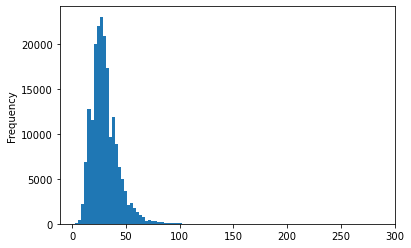

In [ ]:
print('src 평균: %.1f' %(lines.length_src.mean()))
print('src 중앙값: ', lines.length_src.median())
print('src 최대값: ', lines.length_src.max())
lines.length_src.plot(kind='hist', bins= 100);


tar 평균: 35.8
tar 중앙값:  33.0
tar 최대값:  349


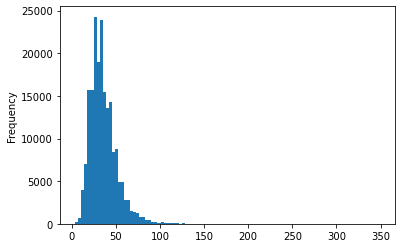

In [ ]:
print('tar 평균: %.1f'%(lines.length_tar.mean()))
print('tar 중앙값: ', lines.length_tar.median())
print('tar 최대값: ', lines.length_tar.max())
lines.length_tar.plot(kind='hist', bins= 100);

In [ ]:
lines.sample(10)

,src,tar,lic,length_src,length_tar
17677,Everybody stayed.,Tout le monde est resté.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,17,24
13197,Come talk to me.,Viens et parle-moi.,CC-BY 2.0 (France) Attribution: tatoeba.org #3...,16,19
73231,Stop being so nice to me.,Arrêtez d'être aussi gentille avec moi !,CC-BY 2.0 (France) Attribution: tatoeba.org #1...,25,40
136456,Tom wanted to be a better teacher.,Tom voulait être un meilleur professeur.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...,34,40
94769,I was miserable and unhappy.,J'étais misérable et malheureux.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,28,32
181530,Women who seek to be equal with men lack ambit...,Les femmes qui cherchent à égaler les hommes m...,CC-BY 2.0 (France) Attribution: tatoeba.org #1...,50,65
10635,I refuse to go.,Je refuse d'y aller.,CC-BY 2.0 (France) Attribution: tatoeba.org #3...,15,20
52886,We're not going there.,Nous n'y allons pas.,CC-BY 2.0 (France) Attribution: tatoeba.org #3...,22,20
34314,Do you go to church?,Fréquentez-vous l'église ?,CC-BY 2.0 (France) Attribution: tatoeba.org #1...,20,26
92795,He started to speak English.,Il s'est mis à parler anglais.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,28,30


In [ ]:
lines_30 = lines.loc[lines.length_src <=30]

In [ ]:
lines_30.shape

(113350, 5)

In [ ]:
lines_30 = lines_30.reset_index()

In [ ]:
lines_30

,index,src,tar,lic,length_src,length_tar
0,0,Go.,Va !,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,3,4
1,1,Go.,Marche.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,3,7
2,2,Go.,Bouge !,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,3,7
3,3,Hi.,Salut !,CC-BY 2.0 (France) Attribution: tatoeba.org #5...,3,7
4,4,Hi.,Salut.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...,3,6
...,...,...,...,...,...,...
113345,119977,"Do you like cake? ""Yes, I do.""","«Aimez-vous les gâteaux ?» «Oui, j'aime ça.»",CC-BY 2.0 (France) Attribution: tatoeba.org #7...,30,44
113346,119978,"Have you eaten? ""Yes, I have.""",« As-tu mangé ? » « Oui. »,CC-BY 2.0 (France) Attribution: tatoeba.org #6...,30,26
113347,119979,"Have you eaten? ""Yes, I have.""",« Avez-vous mangé ? » « Oui. »,CC-BY 2.0 (France) Attribution: tatoeba.org #6...,30,30
113348,119980,"How's it going? ""Not too bad.""",« Comment ça va ? » « Pas trop mal. »,CC-BY 2.0 (France) Attribution: tatoeba.org #4...,30,37


In [ ]:
lines_30.columns

Index(['index', 'src', 'tar', 'lic', 'length_src', 'length_tar'], dtype='object')

In [ ]:
lines_30.drop(['index','lic','length_src','length_tar'],axis=1, inplace=True)

In [ ]:
lines_30.sample(10)

,src,tar
19142,I'll take a beer.,Je prendrai une bière.
32911,We're saving lives.,Nous sauvons des vies.
103786,That isn't your only problem.,Ce n'est pas ton seul problème.
108458,I have enough money to buy it.,Je dispose d'assez d'argent pour faire son acq...
48426,His heart beat slowly.,Son cœur battait lentement.
41486,How could we not win?,Comment pourrions-nous ne pas gagner ?
44663,The maid made my bed.,La bonne a fait mon lit.
71187,I saw her clean the room.,Je l'ai vue ranger la chambre.
58816,The suit's custom-made.,Le costume est fait sur mesure.
67882,You can't get rid of me.,Tu ne peux pas te débarrasser de moi.


In [ ]:
#<sos> : \t
#<eos> : \n
lines_30['tar'] = lines.tar.apply(lambda x: '\t ' + x + '\n' )

In [ ]:
lines_30.sample(10)

,src,tar
45354,Tom is overconfident.,\t Tom est trop sûr de lui.\n
111699,Tom is an electrical engineer.,\t Tom est ingénieur en électricité.\n
384,Push it.,\t Poussez-la.\n
74197,Tom decided to cooperate.,\t Tom a décidé de coopérer.\n
83632,You have such pretty eyes.,\t Tu as de si jolis yeux.\n
91146,You and I are the same age.,\t Vous et moi sommes du même âge.\n
96891,They are reading their book.,\t Elles lisent leur livre.\n
3723,Release him.,\t Relâchez-le !\n
70433,I don't like you anymore.,\t Tu ne me plais plus.\n
33504,You look satisfied.,\t Vous avez l'air satisfaite.\n


In [ ]:
src_vocab = set()
for line in lines_30.src:
    for char in line:
        src_vocab.add(char)

tar_vocab = set()
for line in lines_30.tar:
    for char in line:
        tar_vocab.add(char)


In [ ]:
print('src_vocab','\n', src_vocab)
print('src_vocab length','\n', len(src_vocab), '\n')
print('tar_vocab','\n', tar_vocab)
print('tar_vocab length','\n', len(tar_vocab))

src_vocab 
 {'i', '€', "'", 'K', 'j', '’', '2', 'a', '!', 'D', 'w', 'u', 'C', 'F', 'Z', 'G', '9', 'O', 's', 'V', 'q', 'R', 'n', 'b', 'é', '\xa0', 'h', 'p', 'W', 'r', 'g', 'Y', 'x', 'S', '?', 'H', 'y', '°', 'J', '/', 'l', '$', '&', 'A', '4', 'c', '5', 'M', 'L', 't', 'E', 'v', 'B', '%', '-', '7', 'N', 'I', 'k', 'P', 'U', 'f', 'Q', '.', '1', '"', 'o', 'm', '0', ' ', '‘', '8', 'z', 'd', ',', '6', '3', 'e', ':', 'X', 'T'}
src_vocab length 
 81 

tar_vocab 
 {'i', "'", 'j', 'K', 'î', '’', '\u202f', '2', 'a', '!', 'D', 'w', 'À', 'u', 'C', 'F', 'Z', '9', 'G', 'O', 's', 'V', 'q', '\u2009', 'R', 'n', 'b', 'é', '\xa0', 'h', 'p', 'W', 'r', 'g', 'Y', 'x', 'S', '(', '?', 'ê', '‽', 'y', 'H', 'ç', 'œ', 'J', 'l', '$', 'Ô', '&', 'A', '4', 'c', '5', 'M', '«', '»', 'L', 'Ç', 't', 'E', 'ë', 'à', '+', 'v', 'Ê', 'ô', 'û', 'B', '%', '-', '7', 'N', 'I', 'k', 'â', 'P', 'U', 'É', 'f', 'Q', 'ï', 'ü', '.', '1', '"', ')', '\n', 'ù', '\t', 'o', 'è', 'm', '0', ' ', '\u200b', '‘', '8', 'z', 'd', ',', '6', '3', 'e', ':

In [ ]:
src_vocab_size = len(src_vocab) + 1
tar_vocab_size = len(tar_vocab) + 1
print('src_vocab_size:', src_vocab_size)
print('tar_vocab_size:', tar_vocab_size)

src_vocab_size: 82
tar_vocab_size: 108


In [ ]:
src_vocab = sorted(src_vocab)
tar_vocab = sorted(tar_vocab)

In [ ]:
print(src_vocab[50:75])
print(tar_vocab[50:75])

['b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
['X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v']


In [ ]:
print(src_vocab[:2])
print(tar_vocab[:2])

[' ', '!']
['\t', '\n']


In [ ]:
#dict([('a','b')]) 딕셔너리로 가능

src_to_index =  dict([(word,i+1) for i, word in enumerate (src_vocab)])
tar_to_index =  dict([(word,i+1) for i, word in enumerate (tar_vocab)])


In [ ]:
print(src_to_index)
print(tar_to_index)

{' ': 1, '!': 2, '"': 3, '$': 4, '%': 5, '&': 6, "'": 7, ',': 8, '-': 9, '.': 10, '/': 11, '0': 12, '1': 13, '2': 14, '3': 15, '4': 16, '5': 17, '6': 18, '7': 19, '8': 20, '9': 21, ':': 22, '?': 23, 'A': 24, 'B': 25, 'C': 26, 'D': 27, 'E': 28, 'F': 29, 'G': 30, 'H': 31, 'I': 32, 'J': 33, 'K': 34, 'L': 35, 'M': 36, 'N': 37, 'O': 38, 'P': 39, 'Q': 40, 'R': 41, 'S': 42, 'T': 43, 'U': 44, 'V': 45, 'W': 46, 'X': 47, 'Y': 48, 'Z': 49, 'a': 50, 'b': 51, 'c': 52, 'd': 53, 'e': 54, 'f': 55, 'g': 56, 'h': 57, 'i': 58, 'j': 59, 'k': 60, 'l': 61, 'm': 62, 'n': 63, 'o': 64, 'p': 65, 'q': 66, 'r': 67, 's': 68, 't': 69, 'u': 70, 'v': 71, 'w': 72, 'x': 73, 'y': 74, 'z': 75, '\xa0': 76, '°': 77, 'é': 78, '‘': 79, '’': 80, '€': 81}
{'\t': 1, '\n': 2, ' ': 3, '!': 4, '"': 5, '$': 6, '%': 7, '&': 8, "'": 9, '(': 10, ')': 11, '+': 12, ',': 13, '-': 14, '.': 15, '0': 16, '1': 17, '2': 18, '3': 19, '4': 20, '5': 21, '6': 22, '7': 23, '8': 24, '9': 25, ':': 26, '?': 27, 'A': 28, 'B': 29, 'C': 30, 'D': 31, 'E'

In [ ]:
src_to_index['a']

50

In [ ]:
encoder_input = []

for line in lines_30.src:
    encoded_line = []
    for char in line:
        encoded_line.append(src_to_index[char])
    encoder_input.append(encoded_line)

In [ ]:
print('src 문장 인코딩:', encoder_input[:5])
print('src 문장 원본 : ', '\n', lines_30.src[:5])

src 문장 인코딩: [[30, 64, 10], [30, 64, 10], [30, 64, 10], [31, 58, 10], [31, 58, 10]]
src 문장 원본 :  
 0    Go.
1    Go.
2    Go.
3    Hi.
4    Hi.
Name: src, dtype: object


In [ ]:
print('src 문장 인코딩 last_one:', encoder_input[:])

src 문장 인코딩 last_one: 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
src_to_index['G']

30

In [ ]:
decoder_input = []

for line in lines_30.tar:
    encoded_line = []
    for char in line:
        encoded_line.append(tar_to_index[char])
    decoder_input.append(encoded_line)

In [ ]:
print('src 문장 인코딩:', decoder_input[:5])
print('src 문장 원본 : ', '\n', lines_30.tar[:5])

src 문장 인코딩: [[1, 3, 49, 54, 3, 4, 2], [1, 3, 40, 54, 71, 56, 61, 58, 15, 2], [1, 3, 29, 68, 74, 60, 58, 3, 4, 2], [1, 3, 46, 54, 65, 74, 73, 3, 4, 2], [1, 3, 46, 54, 65, 74, 73, 15, 2]]
src 문장 원본 :  
 0       \t Va !\n
1    \t Marche.\n
2    \t Bouge !\n
3    \t Salut !\n
4     \t Salut.\n
Name: tar, dtype: object


In [ ]:
decoder_target = []

for line in lines_30.tar:
    timestep = 0
    encoded_line = []
    for char in line:
        if timestep > 1:
            encoded_line.append(tar_to_index[char])
        timestep += 1
    decoder_target.append(encoded_line)

In [ ]:
print(encoder_input[:5])
print(decoder_input[:5])
print(decoder_target[:5])


[[30, 64, 10], [30, 64, 10], [30, 64, 10], [31, 58, 10], [31, 58, 10]]
[[1, 3, 49, 54, 3, 4, 2], [1, 3, 40, 54, 71, 56, 61, 58, 15, 2], [1, 3, 29, 68, 74, 60, 58, 3, 4, 2], [1, 3, 46, 54, 65, 74, 73, 3, 4, 2], [1, 3, 46, 54, 65, 74, 73, 15, 2]]
[[49, 54, 3, 4, 2], [40, 54, 71, 56, 61, 58, 15, 2], [29, 68, 74, 60, 58, 3, 4, 2], [46, 54, 65, 74, 73, 3, 4, 2], [46, 54, 65, 74, 73, 15, 2]]


In [ ]:
lines_30.tar.apply(lambda x: x[1:])

0                                            Va !\n
1                                         Marche.\n
2                                         Bouge !\n
3                                         Salut !\n
4                                          Salut.\n
                            ...                    
113345                Un siècle fait cent années.\n
113346       Une vague de froid attaqua l'Europe.\n
113347       Un crocodile n’est pas un alligator.\n
113348     La vache laitière est un animal utile.\n
113349                    On dansera ce vendredi.\n
Name: tar, Length: 113350, dtype: object

In [ ]:
max_src_len = max([len(line) for line in lines_30.src])
max_tar_len = max([len(line) for line in lines_30.tar])
print('max_src_len:',max_src_len)
print('max_tar_len:',max_tar_len)

max_src_len: 30
max_tar_len: 79


In [ ]:
encoder_input = pad_sequences(encoder_input, maxlen = max_src_len, padding='post')
decoder_input = pad_sequences(decoder_input, maxlen = max_tar_len, padding='post')
decoder_target = pad_sequences(decoder_target, maxlen = max_tar_len, padding='post')


In [ ]:
print(encoder_input[0])
print(len(encoder_input[0]))
print(decoder_input[0])
print(len(decoder_input[0]))
print(decoder_target[0])
print(len(decoder_target[0]))


[30 64 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
30
[ 1  3 49 54  3  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0]
79
[49 54  3  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0]
79


In [ ]:
print(to_categorical(encoder_input[0][0]))
print(len(to_categorical(encoder_input[0][0])))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1.]
31


In [ ]:
encoder_input = to_categorical(encoder_input)
decoder_input = to_categorical(decoder_input)
decoder_target = to_categorical(decoder_target)

In [ ]:
print('encoder input dim:', encoder_input.shape)
print('number of samples: ', lines_30.shape[0])
print('max_src_len:',max_src_len)
print('src_vocab_size:', src_vocab_size)
print('-'*40)
print('decoder input dim:', decoder_input.shape)
print('number of samples:', lines_30.shape[0])
print('max_tar_len:', max_tar_len)
print('tar_vocab_size:', tar_vocab_size)
print('-'*40)
print('decoder target dim:', decoder_target.shape)


encoder input dim: (113350, 30, 82)
number of samples:  113350
max_src_len: 30
src_vocab_size: 82
----------------------------------------
decoder input dim: (113350, 79, 108)
number of samples: 113350
max_tar_len: 79
tar_vocab_size: 108
----------------------------------------
decoder target dim: (113350, 79, 108)


In [ ]:
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Embedding, Dense
from tensorflow.keras.models import Model
import numpy as np

In [ ]:
print(Input(82))
print(Input(shape=(82)))
print(Input(shape=(None, src_vocab_size)))

KerasTensor(type_spec=TensorSpec(shape=(None, 82), dtype=tf.float32, name='input_13'), name='input_13', description="created by layer 'input_13'")
KerasTensor(type_spec=TensorSpec(shape=(None, 82), dtype=tf.float32, name='input_14'), name='input_14', description="created by layer 'input_14'")
KerasTensor(type_spec=TensorSpec(shape=(None, None, 82), dtype=tf.float32, name='input_15'), name='input_15', description="created by layer 'input_15'")


In [ ]:
encoder_input_test = Input(82)
encoder_inputs = Input(shape=(None, src_vocab_size))

In [ ]:
print(LSTM(units=256)(encoder_inputs))

tf.Tensor(
[[-0.02010467 -0.00719608 -0.04739439 ...  0.05926302 -0.09720987
   0.08029704]
 [-0.02010467 -0.00719608 -0.04739439 ...  0.05926302 -0.09720987
   0.08029704]
 [-0.02010467 -0.00719608 -0.04739439 ...  0.05926302 -0.09720987
   0.08029704]
 ...
 [-0.02048034  0.00451981 -0.0126261  ... -0.0021705   0.00142284
  -0.01181701]
 [-0.01022105  0.0293772  -0.00567231 ... -0.00042544 -0.01714927
  -0.00429813]
 [-0.00109391  0.01155221 -0.01057624 ... -0.00907972 -0.00348639
   0.0046707 ]], shape=(113350, 256), dtype=float32)


In [ ]:
print(LSTM(units=256)(encoder_inputs))
print(LSTM(units=256, return_sequences=True, return_state=False)(encoder_inputs))
print(LSTM(units=256, return_sequences=False, return_state=True)(encoder_inputs))
print(LSTM(units=256, return_sequences=True, return_state=True)(encoder_inputs))

KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_65/PartitionedCall:0', description="created by layer 'lstm_65'")
KerasTensor(type_spec=TensorSpec(shape=(None, None, 256), dtype=tf.float32, name=None), name='lstm_66/PartitionedCall:1', description="created by layer 'lstm_66'")
[<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_67')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_67')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_67')>]
[<KerasTensor: shape=(None, None, 256) dtype=float32 (created by layer 'lstm_68')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_68')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_68')>]


In [ ]:
# print(SimpleRNN(256, return_sequences=True)(encoder_input))
print(LSTM(units=256)(encoder_inputs))
print(LSTM(units=256, return_sequences=True, return_state=False)(encoder_inputs))
print(LSTM(units=256, return_sequences=False, return_state=True)(encoder_inputs))
print(LSTM(units=256, return_sequences=True, return_state=True)(encoder_inputs))

KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_69/PartitionedCall:0', description="created by layer 'lstm_69'")
KerasTensor(type_spec=TensorSpec(shape=(None, None, 256), dtype=tf.float32, name=None), name='lstm_70/PartitionedCall:1', description="created by layer 'lstm_70'")
[<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_71')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_71')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_71')>]
[<KerasTensor: shape=(None, None, 256) dtype=float32 (created by layer 'lstm_72')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_72')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_72')>]


In [ ]:
# print(LSTM(units=256)(encoder_input_test)) 차원을 맞추어주지 않아서 오류발생 3차원으로 맞춰야함

In [ ]:
encoder_rnn = SimpleRNN(256, return_sequences=True)
encoder_lstm = LSTM(units=256, return_state=True)

In [ ]:
encoder_lstm(encoder_inputs)

[<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_75')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_75')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_75')>]

In [ ]:
encoder_lstm(encoder_inputs)

[<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_75')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_75')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_75')>]

In [ ]:
# LSTM(units=256, return_sequences=True)(Input(shape=(None, src_vocab_size)))
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)

In [ ]:
# encoder_rnn(encoder_inputs)

In [ ]:
print('encoder_outputs:',encoder_outputs)
print('state_h:', state_h)
print('state_c:', state_c)

encoder_outputs: KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_75/PartitionedCall:0', description="created by layer 'lstm_75'")
state_h: KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_75/PartitionedCall:2', description="created by layer 'lstm_75'")
state_c: KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_75/PartitionedCall:3', description="created by layer 'lstm_75'")


In [ ]:
encoder_states = [state_h, state_c]
print(encoder_states) # context vector

[<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_75')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_75')>]


In [ ]:
print(tar_vocab_size)
decoder_inputs = Input(shape=(None, tar_vocab_size))

108


In [ ]:
decoder_inputs

<KerasTensor: shape=(None, None, 108) dtype=float32 (created by layer 'input_18')>

In [ ]:
decoder_lstm = LSTM(units=256, return_state=True, return_sequences=True)

In [ ]:
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

In [ ]:
_ * 10

<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'tf.math.multiply_2')>

In [ ]:
print(decoder_outputs)

KerasTensor(type_spec=TensorSpec(shape=(None, None, 256), dtype=tf.float32, name=None), name='lstm_76/PartitionedCall:1', description="created by layer 'lstm_76'")


In [ ]:
print(tar_vocab_size)
Dense(tar_vocab_size, activation='softmax')

108


In [ ]:
print(tar_vocab_size)
decoder_softmax_layer = Dense(tar_vocab_size, activation = 'softmax')

108


In [ ]:
decoder_outputs = decoder_softmax_layer(decoder_outputs)

In [ ]:
print(decoder_outputs)

KerasTensor(type_spec=TensorSpec(shape=(None, None, 108), dtype=tf.float32, name=None), name='dense_3/Softmax:0', description="created by layer 'dense_3'")


In [ ]:
model=Model([encoder_inputs, decoder_inputs], decoder_outputs)
print(model)

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, None, 82)]   0           []                               
                                                                                                  
 input_18 (InputLayer)          [(None, None, 108)]  0           []                               
                                                                                                  
 lstm_75 (LSTM)                 [(None, 256),        347136      ['input_17[0][0]']               
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

In [ ]:
print(input_)

NameError: name 'input_' is not defined

In [ ]:
model.fit(x=[encoder_input, decoder_input] , y= decoder_target,
         batch_size=64, epochs=5, validation_split=0.2)

Epoch 1/5
1417/1417 [==============================] - 300s 212ms/step - loss: 0.4595 - val_loss: 0.6573
Epoch 2/5
1417/1417 [==============================] - 301s 213ms/step - loss: 0.4418 - val_loss: 0.6442
Epoch 3/5
1417/1417 [==============================] - 307s 217ms/step - loss: 0.4269 - val_loss: 0.6327
Epoch 4/5
1417/1417 [==============================] - 306s 216ms/step - loss: 0.4144 - val_loss: 0.6217
Epoch 5/5
1417/1417 [==============================] - 308s 217ms/step - loss: 0.4037 - val_loss: 0.6151


In [ ]:
model.save_weights('./')

In [ ]:
model.save_weights('ed_fra_eng_0705.h5')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, None, 82)]   0           []                               
                                                                                                  
 input_18 (InputLayer)          [(None, None, 108)]  0           []                               
                                                                                                  
 lstm_75 (LSTM)                 [(None, 256),        347136      ['input_17[0][0]']               
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

In [ ]:
print(encoder_inputs)
print(decoder_inputs)

KerasTensor(type_spec=TensorSpec(shape=(None, None, 82), dtype=tf.float32, name='input_17'), name='input_17', description="created by layer 'input_17'")
KerasTensor(type_spec=TensorSpec(shape=(None, None, 108), dtype=tf.float32, name='input_18'), name='input_18', description="created by layer 'input_18'")


In [ ]:
encoder_model = Model(inputs=encoder_inputs, outputs=encoder_states)

In [ ]:
encoder_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, None, 82)]        0         
                                                                 
 lstm_75 (LSTM)              [(None, 256),             347136    
                              (None, 256),                       
                              (None, 256)]                       
                                                                 
Total params: 347,136
Trainable params: 347,136
Non-trainable params: 0
_________________________________________________________________


In [ ]:
decoder_state_input_h = Input(shape=(256,))
decoder_state_input_c = Input(shape=(256,))
decoder_state_input = [decoder_state_input_h, decoder_state_input_c]
print(decoder_state_input_h)
print(decoder_state_input_c)

KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name='input_21'), name='input_21', description="created by layer 'input_21'")
KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name='input_22'), name='input_22', description="created by layer 'input_22'")


In [ ]:
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_state_input)

In [ ]:
print(decoder_outputs)
print(state_h)
print(state_c)

KerasTensor(type_spec=TensorSpec(shape=(None, None, 256), dtype=tf.float32, name=None), name='lstm_76/PartitionedCall:1', description="created by layer 'lstm_76'")
KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_76/PartitionedCall:2', description="created by layer 'lstm_76'")
KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_76/PartitionedCall:3', description="created by layer 'lstm_76'")


In [ ]:
decoder_states = [state_h, state_c]
decoder_outputs = decoder_softmax_layer(decoder_outputs)
decoder_model = Model(inputs=[decoder_inputs] + decoder_state_input,
                     outputs=[decoder_outputs, state_h, state_c])

In [ ]:
print(decoder_inputs)
print(decoder_state_input)
print([decoder_inputs] + decoder_state_input)

KerasTensor(type_spec=TensorSpec(shape=(None, None, 108), dtype=tf.float32, name='input_18'), name='input_18', description="created by layer 'input_18'")
[<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'input_21')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'input_22')>]
[<KerasTensor: shape=(None, None, 108) dtype=float32 (created by layer 'input_18')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'input_21')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'input_22')>]


In [ ]:
# [decoder_inputs, decoder_state_input_h, decoder_state_input_c]
print(decoder_outputs)
print(decoder_state_input_h)
print(decoder_state_input_c)

KerasTensor(type_spec=TensorSpec(shape=(None, None, 108), dtype=tf.float32, name=None), name='dense_3/Softmax:0', description="created by layer 'dense_3'")
KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name='input_21'), name='input_21', description="created by layer 'input_21'")
KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name='input_22'), name='input_22', description="created by layer 'input_22'")


In [ ]:
print(src_to_index)
print(tar_to_index)
print(src_to_index.items())

{' ': 1, '!': 2, '"': 3, '$': 4, '%': 5, '&': 6, "'": 7, ',': 8, '-': 9, '.': 10, '/': 11, '0': 12, '1': 13, '2': 14, '3': 15, '4': 16, '5': 17, '6': 18, '7': 19, '8': 20, '9': 21, ':': 22, '?': 23, 'A': 24, 'B': 25, 'C': 26, 'D': 27, 'E': 28, 'F': 29, 'G': 30, 'H': 31, 'I': 32, 'J': 33, 'K': 34, 'L': 35, 'M': 36, 'N': 37, 'O': 38, 'P': 39, 'Q': 40, 'R': 41, 'S': 42, 'T': 43, 'U': 44, 'V': 45, 'W': 46, 'X': 47, 'Y': 48, 'Z': 49, 'a': 50, 'b': 51, 'c': 52, 'd': 53, 'e': 54, 'f': 55, 'g': 56, 'h': 57, 'i': 58, 'j': 59, 'k': 60, 'l': 61, 'm': 62, 'n': 63, 'o': 64, 'p': 65, 'q': 66, 'r': 67, 's': 68, 't': 69, 'u': 70, 'v': 71, 'w': 72, 'x': 73, 'y': 74, 'z': 75, '\xa0': 76, '°': 77, 'é': 78, '‘': 79, '’': 80, '€': 81}
{'\t': 1, '\n': 2, ' ': 3, '!': 4, '"': 5, '$': 6, '%': 7, '&': 8, "'": 9, '(': 10, ')': 11, '+': 12, ',': 13, '-': 14, '.': 15, '0': 16, '1': 17, '2': 18, '3': 19, '4': 20, '5': 21, '6': 22, '7': 23, '8': 24, '9': 25, ':': 26, '?': 27, 'A': 28, 'B': 29, 'C': 30, 'D': 31, 'E'

In [ ]:
index_to_src = dict((i, char)for char, i in src_to_index.items())
index_to_tar = dict((i, char)for char, i in tar_to_index.items())

In [ ]:
print(src_to_index)
print(tar_to_index)
print(index_to_src)
print(index_to_tar)

{' ': 1, '!': 2, '"': 3, '$': 4, '%': 5, '&': 6, "'": 7, ',': 8, '-': 9, '.': 10, '/': 11, '0': 12, '1': 13, '2': 14, '3': 15, '4': 16, '5': 17, '6': 18, '7': 19, '8': 20, '9': 21, ':': 22, '?': 23, 'A': 24, 'B': 25, 'C': 26, 'D': 27, 'E': 28, 'F': 29, 'G': 30, 'H': 31, 'I': 32, 'J': 33, 'K': 34, 'L': 35, 'M': 36, 'N': 37, 'O': 38, 'P': 39, 'Q': 40, 'R': 41, 'S': 42, 'T': 43, 'U': 44, 'V': 45, 'W': 46, 'X': 47, 'Y': 48, 'Z': 49, 'a': 50, 'b': 51, 'c': 52, 'd': 53, 'e': 54, 'f': 55, 'g': 56, 'h': 57, 'i': 58, 'j': 59, 'k': 60, 'l': 61, 'm': 62, 'n': 63, 'o': 64, 'p': 65, 'q': 66, 'r': 67, 's': 68, 't': 69, 'u': 70, 'v': 71, 'w': 72, 'x': 73, 'y': 74, 'z': 75, '\xa0': 76, '°': 77, 'é': 78, '‘': 79, '’': 80, '€': 81}
{'\t': 1, '\n': 2, ' ': 3, '!': 4, '"': 5, '$': 6, '%': 7, '&': 8, "'": 9, '(': 10, ')': 11, '+': 12, ',': 13, '-': 14, '.': 15, '0': 16, '1': 17, '2': 18, '3': 19, '4': 20, '5': 21, '6': 22, '7': 23, '8': 24, '9': 25, ':': 26, '?': 27, 'A': 28, 'B': 29, 'C': 30, 'D': 31, 'E'

In [ ]:
encoder_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, None, 82)]        0         
                                                                 
 lstm_75 (LSTM)              [(None, 256),             347136    
                              (None, 256),                       
                              (None, 256)]                       
                                                                 
Total params: 347,136
Trainable params: 347,136
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#<sos> 입력값 생성
print(np.zeros((2,2)))
print(tar_vocab_size)
print(np.zeros((1,1,tar_vocab_size)))
target_seq = np.zeros((1,1, tar_vocab_size))
print(target_seq.shape)

[[0. 0.]
 [0. 0.]]
108
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
(1, 1, 108)


In [ ]:
tar_to_index['\t']

1

In [ ]:
print(target_seq)
print(target_seq[0])
print(target_seq[0][0])
print(target_seq[0,0,1])

[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
target_seq[0,0,1]=1

In [ ]:
print(target_seq)
print(target_seq.shape)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
(1, 1, 108)


In [ ]:
print(encoder_input[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
decoder_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, None, 108)]  0           []                               
                                                                                                  
 input_21 (InputLayer)          [(None, 256)]        0           []                               
                                                                                                  
 input_22 (InputLayer)          [(None, 256)]        0           []                               
                                                                                                  
 lstm_76 (LSTM)                 [(None, None, 256),  373760      ['input_18[0][0]',               
                                 (None, 256),                     'input_21[0][0]',         

In [ ]:
print('1 target_seq (<sos>, decoder model 예측 시 입력)')
print('*'*75)
print('target_seq:','\n', target_seq)
print('target_seq[0][0]:', target_seq[0][0])
print('len(target_seq[0][0]):', len(target_seq[0][0]))
print('target_seq.shape:', target_seq.shape)
print('*'*75)

1 target_seq (<sos>, decoder model 예측 시 입력)
***************************************************************************
target_seq: 
 [[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
target_seq[0][0]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
len(target_seq[0][0]): 108
target_seq.shape: (1, 1, 108)
***************************************************************************


In [ ]:
print('2 states_value (인코더 모델 히든, 셀 상태 출력을 예측 시 입력)')
print('-', 75)
print('states_value:', '\n', states_value)
print('len(states_value):', len(states_value))
print('-'* 75)
print('2.1 히든 상태값 (state_value[0])')
print('-' * 70)
print(states_value[0])
print('states_value[0].shape:', states_value[0].shape)
print('-' * 70, '\n')

print('2.2 셀 상태값 (state_value[1])')
print('-' * 70)
print(states_value[1])
print('states_value[1].shape:', states_value[1].shape)
print('-' * 70, '\n')

2 states_value (인코더 모델 히든, 셀 상태 출력을 예측 시 입력)
- 75
states_value: 
 [array([[-0.50582755,  0.3270781 , -0.81683266, ..., -0.97951233,
         0.8188819 , -0.08533001],
       [-0.50582755,  0.3270781 , -0.81683266, ..., -0.97951233,
         0.8188819 , -0.08533001],
       [-0.50582755,  0.3270781 , -0.81683266, ..., -0.97951233,
         0.8188819 , -0.08533001],
       ...,
       [-0.02250035,  0.06579947,  0.9458047 , ..., -0.38284114,
         0.47484368, -0.8845446 ],
       [-0.06818507,  0.5987558 , -0.84146917, ..., -0.05364773,
         0.33302024,  0.7782463 ],
       [-0.01737162,  0.6432283 , -0.8684892 , ...,  0.04264984,
         0.16659407,  0.8694936 ]], dtype=float32), array([[-10.792576  ,  18.5118    ,  -4.3467245 , ...,  -2.6525257 ,
          2.7966201 ,  -0.09787604],
       [-10.792576  ,  18.5118    ,  -4.3467245 , ...,  -2.6525257 ,
          2.7966201 ,  -0.09787604],
       [-10.792576  ,  18.5118    ,  -4.3467245 , ...,  -2.6525257 ,
          2.7966201 ,  

In [ ]:
print(target_seq)
print([target_seq])
print(states_value)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
[array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]])]
[array([[-0.50582755,  0.3270781 , -0.81683266, ..., -0.97951233,
         0.8188819 , -0.08533001],
       [-0.50582755,  0.3270781 , -0.81683266, ..., -0.97

In [ ]:
pre_input = [target_seq]+ states_value
print(pre_input)
print(len(pre_input))
print('sos:',pre_input[0])
print('sos dim:',pre_input[0].shape)
print('h:',pre_input[1])
print('h dim:',pre_input[1].shape)
print('c:',pre_input[2])
print('c dim:',pre_input[2].shape)

[array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]]), array([[-0.50582755,  0.3270781 , -0.81683266, ..., -0.97951233,
         0.8188819 , -0.08533001],
       [-0.50582755,  0.3270781 , -0.81683266, ..., -0.97951233,
         0.8188819 , -0.08533001],
       [-0.50582755,  0.3270781 , -0.81683266, ..., -0.97951233,
         0.8188819 , -0.08533001],
       ...,
       [-0.02250035,  0.06579947,  0.9458047 , ..., -0.38284114,
         0.47484368, -0.8845446 ],
       [-0.06818507,  0.5987558 , -0.84146917, ..., -0.05364773,
         0.33302024,  0

In [ ]:
decoder_model.predict(pre_input)

ValueError: Data cardinality is ambiguous:
  x sizes: 1, 113350, 113350
Make sure all arrays contain the same number of samples.

In [ ]:
print(encoder_input[0][0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(np.where(encoder_input[0][0]==1))

(array([30], dtype=int64),)


In [ ]:
print(np.where(encoder_input[0][0]==1)[0][0])

30


In [ ]:
print(src_vocab)

[' ', '!', '"', '$', '%', '&', "'", ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\xa0', '°', 'é', '‘', '’', '€']


In [ ]:
lines.iloc[0]

src                                                         Go.
tar                                                        Va !
lic           CC-BY 2.0 (France) Attribution: tatoeba.org #2...
length_src                                                    3
length_tar                                                    4
Name: 0, dtype: object

In [ ]:
states_value = encoder_model.predict(encoder_input)

3543/3543 [==============================] - 69s 19ms/step


In [ ]:
print('encoder_states_value')
print('*'*75)
print('len(states_value):', len(states_value))
print('h:',states_value)
print('h:',states_value[0])
print('h dim: ', states_value[0].shape)
print('-'*70)
print('c:',states_value[1])
print('c dim: ', states_value[1].shape)
print('-'*70)

encoder_states_value
***************************************************************************
len(states_value): 2
h: [array([[-0.50582755,  0.3270781 , -0.81683266, ..., -0.97951233,
         0.8188819 , -0.08533001],
       [-0.50582755,  0.3270781 , -0.81683266, ..., -0.97951233,
         0.8188819 , -0.08533001],
       [-0.50582755,  0.3270781 , -0.81683266, ..., -0.97951233,
         0.8188819 , -0.08533001],
       ...,
       [-0.02250035,  0.06579947,  0.9458047 , ..., -0.38284114,
         0.47484368, -0.8845446 ],
       [-0.06818507,  0.5987558 , -0.84146917, ..., -0.05364773,
         0.33302024,  0.7782463 ],
       [-0.01737162,  0.6432283 , -0.8684892 , ...,  0.04264984,
         0.16659407,  0.8694936 ]], dtype=float32), array([[-10.792576  ,  18.5118    ,  -4.3467245 , ...,  -2.6525257 ,
          2.7966201 ,  -0.09787604],
       [-10.792576  ,  18.5118    ,  -4.3467245 , ...,  -2.6525257 ,
          2.7966201 ,  -0.09787604],
       [-10.792576  ,  18.5118    ,  

In [ ]:
print(encoder_input.shape)
print(encoder_input)

(113350, 30, 82)
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0.

In [ ]:
model.save_weights('./')